In [221]:
import csv

In [222]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

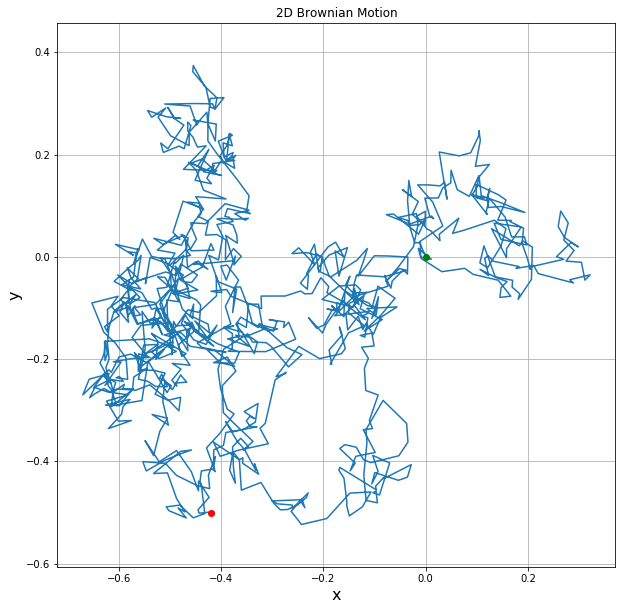

In [444]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title
plt.figure(figsize=(10,10))

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 1000
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
plt.savefig('2D Brownian Motion.png',bbox_inches='tight', format='png', dpi=300)
show()

`Mean Square Difference`

In [445]:
xx = x[0]; yy = x[1]

In [446]:
xx.shape[0]

1001

In [447]:
p = [1,2,3,4,5]
q = [6,7,8,9,10]

In [448]:
arr = []
arr.append(1)
arr.append(4)
arr.append(10)
np_arr = np.array(arr)

In [449]:
arr

[1, 4, 10]

In [450]:
arr = []

In [451]:
arr

[]

In [452]:
xx.shape[0]

1001

In [453]:
range(1,4)

range(1, 4)

In [455]:
N = xx.shape[0]; count = 1; n=N-1; sqDisplacement = []
for n in range(1,N-1):
    for i in range(1,N-n):
        sqDisplacement.append( ((xx[i+n]-xx[i])**2) + ((yy[i+n]-yy[i])**2) )
    sqDisp = np.array(sqDisplacement)
    msd = np.mean(sqDisplacement)
    with open('msd.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([msd])

In [456]:
import pandas as pd
msd = pd.read_csv('msd.csv',names=['msd'])
msd.shape

(999, 1)

In [457]:
#tym = np.round( np.linspace(0,1,2999), 2 )
tym = np.linspace(0,1,msd.shape[0])
tym.shape

(999,)

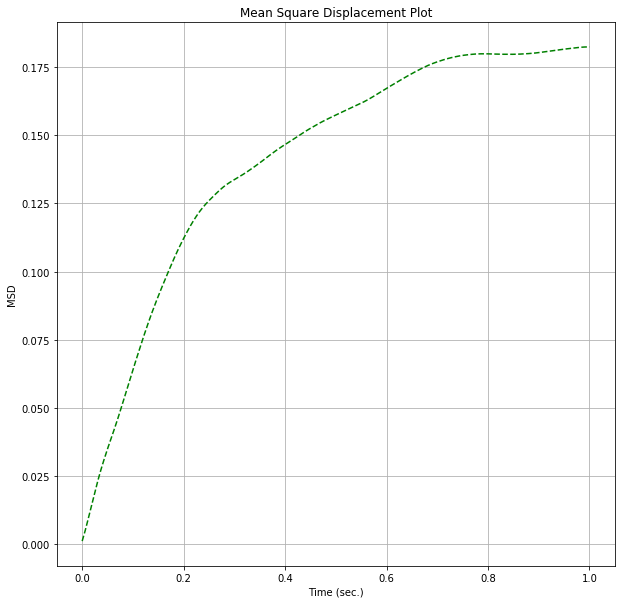

In [463]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(tym,msd,'g--')
plt.xlabel('Time (sec.)')
plt.ylabel('MSD')
plt.title('Mean Square Displacement Plot')
plt.grid()

plt.savefig('MSD.png',bbox_inches='tight', format='png', dpi=300)

In [464]:
tiym = pd.DataFrame(tym)
msd = pd.DataFrame(msd)
data = pd.concat([tiym,msd],axis=1)
data.columns = ['time','msd']
#data.to_csv('timeMSD.csv',index=None)
ax = data['time']; ay = data['msd']

In [499]:
ax = data['time']; ay = data['msd']

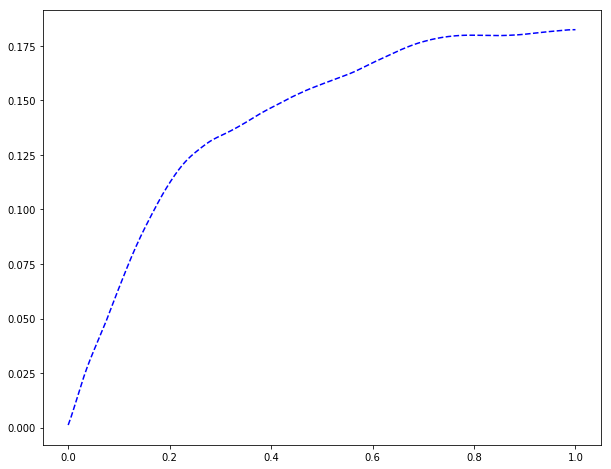

In [501]:
plt.figure(figsize=(10,8))
plt.plot(ax,ay,'b--')

In [504]:
tenth = int(round( (10/100)*ax.shape[0],0 ))
tenth

100

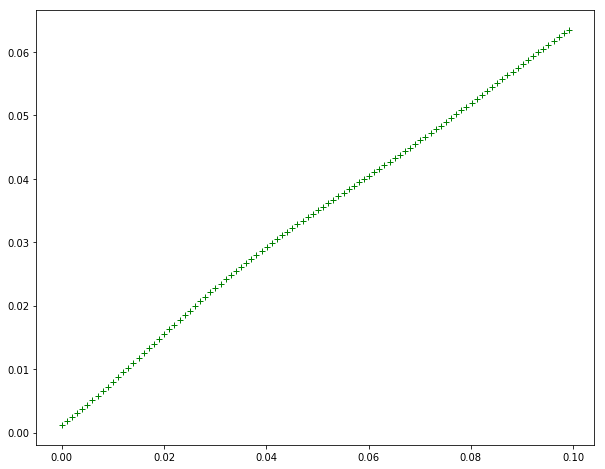

In [506]:
ax = ax[0:tenth]
ay = ay[0:tenth]
plt.figure(figsize=(10,8))
plt.plot(ax,ay,'g+')

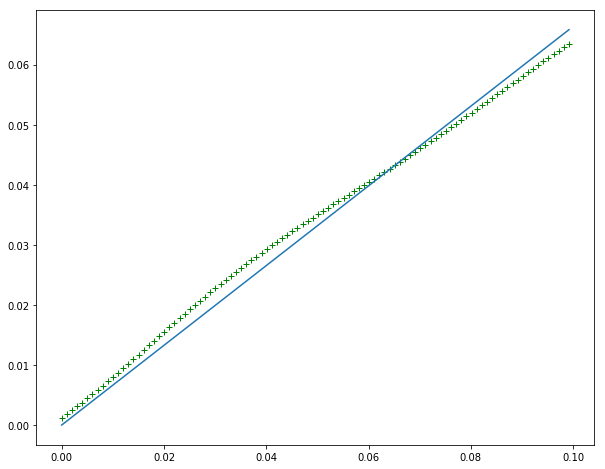

In [511]:
from scipy.optimize import curve_fit

def diffu(ax,D):
    return (4*D*ax)

popt, pcov = curve_fit(diffu,ax,ay)
ans = 4*popt[0]*ax

plt.figure(figsize=(10,8))
plt.plot(ax,ay,'g+')
plt.plot(ax,ans)

In [513]:
popt[0]

0.1658977972884203

In [516]:
pcov[0]

array([6.38120656e-07])